In [2]:
import pandas as pd 
import numpy as np

In [3]:
covidDf = pd.read_csv(r'C:\Users\Rumay-Paz\Desktop\Programming\Data-Analysis-Notebooks\Covid19Casos.csv', encoding='utf-8')

In [4]:
for i in covidDf.columns:
    print(i)

id_evento_caso
sexo
edad
edad_años_meses
residencia_pais_nombre
residencia_provincia_nombre
residencia_departamento_nombre
carga_provincia_nombre
fecha_inicio_sintomas
fecha_apertura
sepi_apertura
fecha_internacion
cuidado_intensivo
fecha_cui_intensivo
fallecido
fecha_fallecimiento
asistencia_respiratoria_mecanica
carga_provincia_id
origen_financiamiento
clasificacion
clasificacion_resumen
residencia_provincia_id
fecha_diagnostico
residencia_departamento_id
ultima_actualizacion


In [5]:
covidDf['residencia_provincia_nombre'].unique()

array(['CABA', 'Buenos Aires', 'Córdoba', 'Mendoza', 'Formosa',
       'Santa Fe', 'San Luis', 'Entre Ríos', 'Tucumán', 'Chaco',
       'Corrientes', 'Río Negro', 'La Pampa', 'Santa Cruz',
       'Santiago del Estero', 'Neuquén', 'SIN ESPECIFICAR', 'San Juan',
       'Chubut', 'Catamarca', 'Tierra del Fuego', 'Misiones', 'Jujuy',
       'La Rioja', 'Salta'], dtype=object)

In [6]:
covidDf = covidDf[(covidDf['residencia_provincia_nombre'] == 'CABA') | (covidDf['carga_provincia_nombre'] == 'CABA')] 
# Esta es la medida mas cercana a lo que reporta google (279k)
covidDf = covidDf[covidDf['clasificacion_resumen'] == 'Confirmado']

In [32]:
covidDf['mes_diagnostico'] = pd.DatetimeIndex(covidDf['fecha_diagnostico']).month

covidDf['temperatura_mes'] = np.where(covidDf['mes_diagnostico'] == 1, 25.1,
                             np.where(covidDf['mes_diagnostico'] == 2, 24.45,
                             np.where(covidDf['mes_diagnostico'] == 3, 24.35,
                             np.where(covidDf['mes_diagnostico'] == 4, 18.2,
                             np.where(covidDf['mes_diagnostico'] == 5, 15.7,
                             np.where(covidDf['mes_diagnostico'] == 6, 13,
                             np.where(covidDf['mes_diagnostico'] == 7, 13,
                             np.where(covidDf['mes_diagnostico'] == 8, 13,
                             np.where(covidDf['mes_diagnostico'] == 9, 14.5,
                             np.where(covidDf['mes_diagnostico'] == 10, 18,
                             np.where(covidDf['mes_diagnostico'] == 11, 21,
                             np.where(covidDf['mes_diagnostico'] == 12, 23.5, 'not available'))))))))))))



covidDf['estacion'] = np.where((covidDf['fecha_diagnostico'] >= '2020-03-21') & (covidDf['fecha_diagnostico'] < '2020-06-21'), '2 Otoño',
                      np.where((covidDf['fecha_diagnostico'] >= '2020-06-21') & (covidDf['fecha_diagnostico'] < '2020-09-21'), '3 Invierno',
                      np.where((covidDf['fecha_diagnostico'] >= '2020-09-21') & (covidDf['fecha_diagnostico'] < '2020-12-21'), '4 Primavera','1 Verano')))


                      

SyntaxError: invalid syntax (<ipython-input-32-82680edb3713>, line 14)

In [25]:
covidDf['mes_diagnostico'].unique()

array([ 6.,  5.,  9.,  7.,  4.,  8., 11., 10., nan,  3.])

<AxesSubplot:xlabel='mes_diagnostico'>

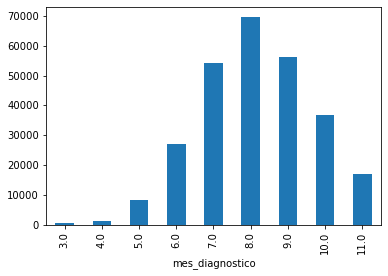

In [26]:
pormes = covidDf['mes_diagnostico'].groupby(covidDf['mes_diagnostico']).agg('count')
pormes.plot(kind='bar')

<AxesSubplot:xlabel='estacion'>

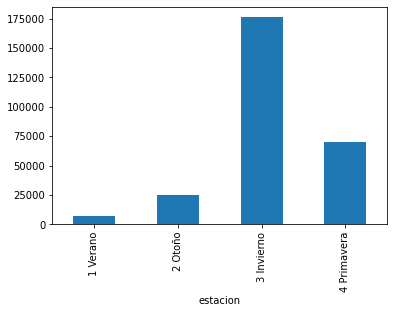

In [27]:
porestacion = covidDf['estacion'].groupby(covidDf['estacion']).agg('count')
porestacion.plot(kind='bar')

<AxesSubplot:xlabel='temperatura_mes'>

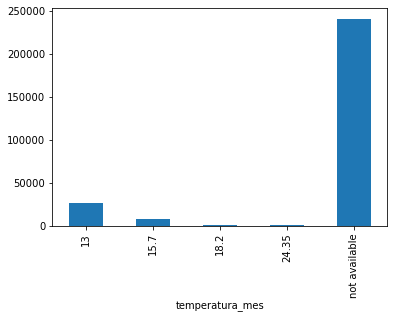

In [30]:
portemp = covidDf['temperatura_mes'].groupby(covidDf['temperatura_mes']).agg('count')
portemp.plot(kind='bar')